In [35]:
from datasets import Dataset
from datasets import load_from_disk

data = load_from_disk('./datasets')

In [36]:
data

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
})

In [37]:
new_data = data['test'].train_test_split(train_size=0.5, seed=42)
data['test'] = new_data.pop("train")
# 将原数据集的测试集仍作为测试集
data['val'] = new_data.pop("test")

Loading cached split indices for dataset at /home/lijinrun/lgs/Roberta-Llama-Mistral/datasets/test/cache-ecb305c67be2587b.arrow and /home/lijinrun/lgs/Roberta-Llama-Mistral/datasets/test/cache-fc5210a6d72c4c50.arrow


In [38]:
data

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 12500
    })
    val: Dataset({
        features: ['text', 'label'],
        num_rows: 12500
    })
})

In [39]:
data['train'].to_pandas()['label'].value_counts()

label
0    12500
1    12500
Name: count, dtype: int64

In [40]:
data['test'].to_pandas()['label'].value_counts()

label
1    6267
0    6233
Name: count, dtype: int64

In [41]:
data['val'].to_pandas()['label'].value_counts()

label
0    6267
1    6233
Name: count, dtype: int64

In [43]:
max_char = data['train'].to_pandas()['text'].str.len().max()
# 词数
max_words = data['train'].to_pandas()['text'].str.split().str.len().max()
max_char, max_words

(13704, 2470)

(array([9.700e+01, 9.390e+02, 1.131e+03, 1.412e+03, 3.642e+03, 3.531e+03,
        2.486e+03, 1.810e+03, 1.436e+03, 1.183e+03, 9.560e+02, 8.040e+02,
        7.080e+02, 6.150e+02, 5.430e+02, 4.080e+02, 4.020e+02, 3.210e+02,
        3.270e+02, 2.430e+02, 2.310e+02, 1.930e+02, 1.810e+02, 1.620e+02,
        1.370e+02, 1.150e+02, 1.130e+02, 9.100e+01, 9.600e+01, 7.500e+01,
        7.400e+01, 5.800e+01, 6.800e+01, 5.200e+01, 3.800e+01, 4.400e+01,
        4.200e+01, 2.900e+01, 4.900e+01, 7.000e+01, 6.000e+01, 1.000e+00,
        3.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

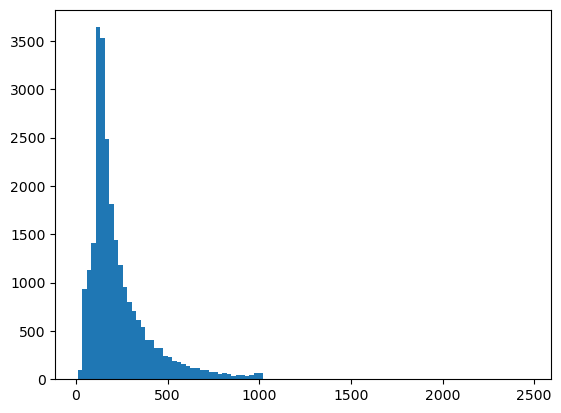

In [52]:
import numpy as np
from matplotlib import pyplot as plt
all_char = [len(x.split()) for x in data['train'].to_pandas()['text']]
# 统计all_char的分布
all_char = np.array(all_char)
plt.hist(all_char, bins=100)